In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df1=pd.read_csv("clean_data_w_combined_grps.csv")

In [3]:
df1.head()

,Short description,Description,issue_description,Assignment group,Combined_grps
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,GRP_0,G_0_17
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,GRP_0,G_0_17
2,cant log vpn,hii cannot log vpnbest,cant log vpn hii cannot log vpnbest,GRP_0,G_0_17
3,access hrtool page,NaN,access hrtool page,GRP_0,G_0_17
4,skype error,NaN,skype error,GRP_0,G_0_17


In [4]:
df1.info()
# Description column has been made blank in preprocessing whenever it is equal to Short Description. Hence there are many null values in Description column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8310 entries, 0 to 8309
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8310 non-null   object
 1   Description        4460 non-null   object
 2   issue_description  8310 non-null   object
 3   Assignment group   8310 non-null   object
 4   Combined_grps      8310 non-null   object
dtypes: object(5)
memory usage: 324.7+ KB


In [5]:
df1["Combined_grps"].nunique()

30

In [6]:
df1["Combined_grps"].value_counts()

G_0_17                   3944
G_10_47_5_57_6_60_8_9    1393
G_12_2                    498
G_24_28_33_42             473
G_19_3_56                 418
G_13_18_41                272
G_14_20_43_45             194
G_23_4_51_54_61           136
G_15_22_38_40_44_63       135
G_11_29_46                132
G_30_31_39_62             125
G_25_59                   122
G_16_21                   113
G_36_37_7                  99
G_34                       61
G_26_70                    57
G_1_65                     42
G_27                       18
G_50_64_72                 17
G_52_68                    12
G_53                       11
G_48_69                     8
G_55                        8
G_49                        6
G_66                        4
G_32                        4
G_58                        3
G_35_67                     2
G_71                        2
G_73                        1
Name: Combined_grps, dtype: int64

In [7]:
df1["Assignment group"].nunique()

74

In [8]:
df1["Assignment group"].value_counts()

GRP_0     3919
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      183
GRP_13     144
GRP_10     140
GRP_5      128
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      96
GRP_18      88
GRP_16      85
GRP_7       68
GRP_34      61
GRP_31      60
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      38
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
GRP_21      28
GRP_47      27
GRP_17      25
GRP_23      25
GRP_62      25
GRP_30      21
GRP_39      19
GRP_27      18
GRP_60      16
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_59       6
GRP_48       6
GRP_46       6
GRP_49       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_63       3
GRP_38       3
GRP_58       3
GRP_68       3
GRP_56       3
GRP_71       2
GRP_72       2
GRP_69       2
GRP_57    

## vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
from sklearn.model_selection import train_test_split
X=df1['issue_description']
y=df1['Combined_grps']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(5817,)
(2493,)


In [12]:
vec = CountVectorizer(binary=True,max_features=5000,ngram_range=(1, 2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [13]:
len(vec.vocabulary_)

5000

In [14]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#encode target variable
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)

In [15]:
y_train

array([ 0,  0, 10, ...,  7,  0,  1])

## Defining function for model fitting and evaluation

In [16]:
from sklearn import linear_model, naive_bayes, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import random

lab= list(df1["Combined_grps"].value_counts().index)
plab=["Pr "+str(s) for s in lab]

target_names = list(encoder.classes_) # output labels for report generation
def report_generation(classifier, train_data, test_data, train_y, y_test, average):
    
    classifier.fit(train_data, train_y)
    pred_test = classifier.predict(test_data)
    pred_inversed = encoder.inverse_transform(pred_test)
    y_test_inversed = encoder.inverse_transform(y_test)
    
    print("Accuracy :", metrics.accuracy_score(pred_test, y_test))
    report = classification_report(y_test, pred_test, output_dict=True, target_names=target_names,zero_division=1)
    
    print("Other metrics", report[average])
    
    cm=metrics.confusion_matrix(y_test_inversed, pred_inversed, labels=lab)
  
    if average == 'weighted avg':
        
        df_cm = pd.DataFrame(cm, index = [i for i in lab],columns = [i for i in plab])
        plt.figure(figsize = (20,16))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        
        print("\n Some random test predictions \n")
        randomlist =random.sample(range(1, 2466), 10)
        for i in randomlist:
            print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
            X_test[i],
            (y_test_inversed[i]),
            (pred_inversed[i])))
    

## Logistic Regression

Accuracy : 0.7412755716004813
Other metrics {'precision': 0.738729895152012, 'recall': 0.7412755716004813, 'f1-score': 0.7119309320772338, 'support': 2493}

 Some random test predictions 

Title:	password reset reset password user q quality uacyltoe hgaycze erpuser rayhtuorv
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	setup new w svujkpg tpurnjvi 
True labels:	G_24_28_33_42
Predicted labels:	G_24_28_33_42


Title:	connect vpn 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	outlook launching outlook launching contact connected user system using teamviewer user confirmed use m crm tried repair m office restarted pc tried reconfigure outlook taking time outlook ver user mentioned call u back tomorrow ticket nunber user
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	vip window password reset tifpdchb pedruyf 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	username submit insurance 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	access email hi teamkind

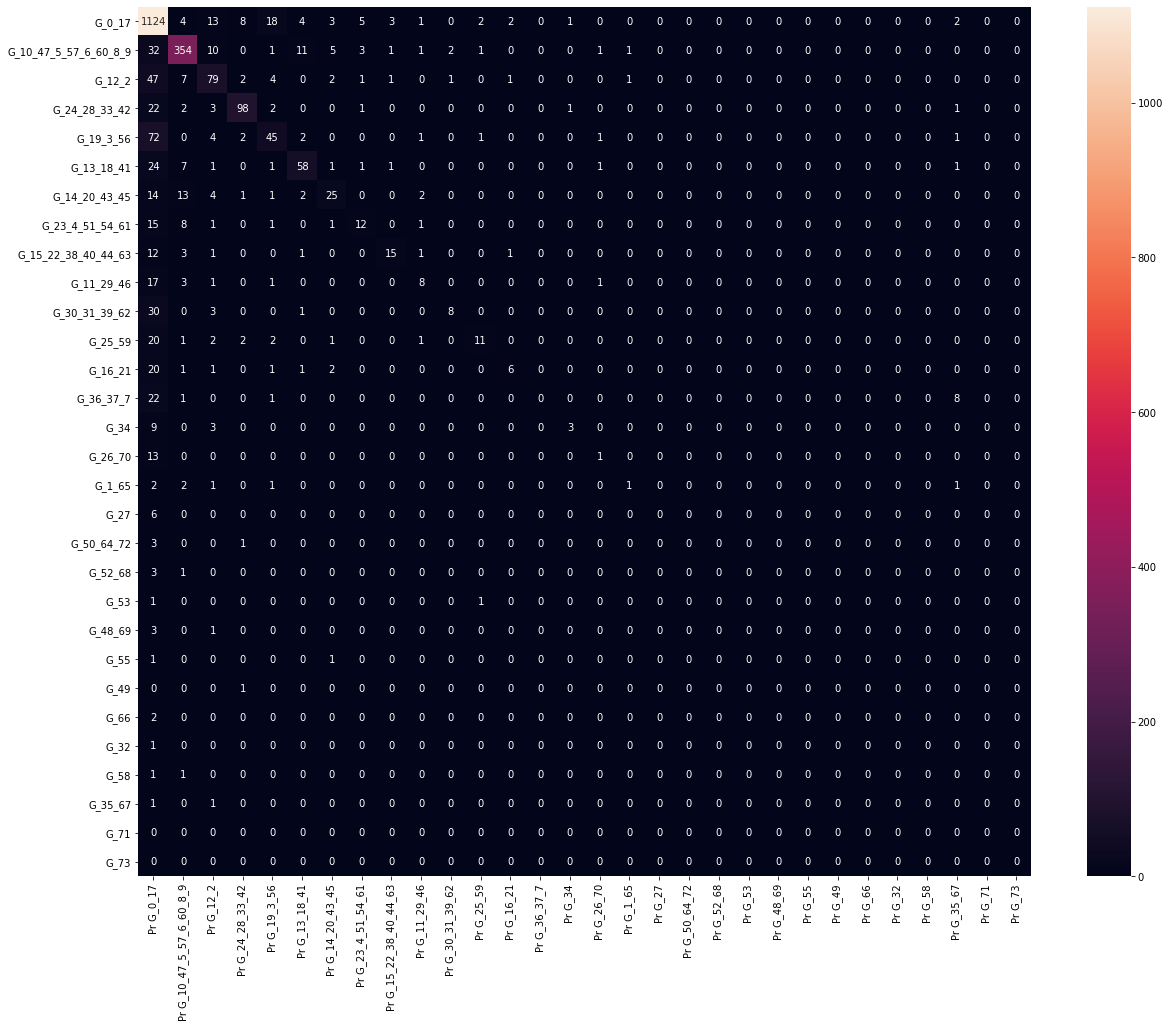

In [17]:
 #Logistic Regression weighted average
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test,'weighted avg')
#print("Logistic Regression weighted avg Count Vectorizer Report", report['weighted avg'])

# SVM classifier (have done hyperparameter tuning for this and used best parameters)

Accuracy : 0.7296430004011232
Other metrics {'precision': 0.7352970082557175, 'recall': 0.7296430004011232, 'f1-score': 0.6955145580049246, 'support': 2493}

 Some random test predictions 

Title:	log es 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	outlook issue guy advised change password passwordmanagementtool manager since done delay e mail per screenshot cid c
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	fill epense report form employee 
True labels:	G_12_2
Predicted labels:	G_0_17


Title:	job job failed jobscheduler 
True labels:	G_10_47_5_57_6_60_8_9
Predicted labels:	G_10_47_5_57_6_60_8_9


Title:	personal device set procedure team send link information set personal tablet receive company email echange server ticket completed understand set tablet submit best
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	erp frequent disconnection frequent disconnection erp slow also checked earliest
True labels:	G_23_4_51_54_61
Predicted labels:	G_0_17


Title:	kein 

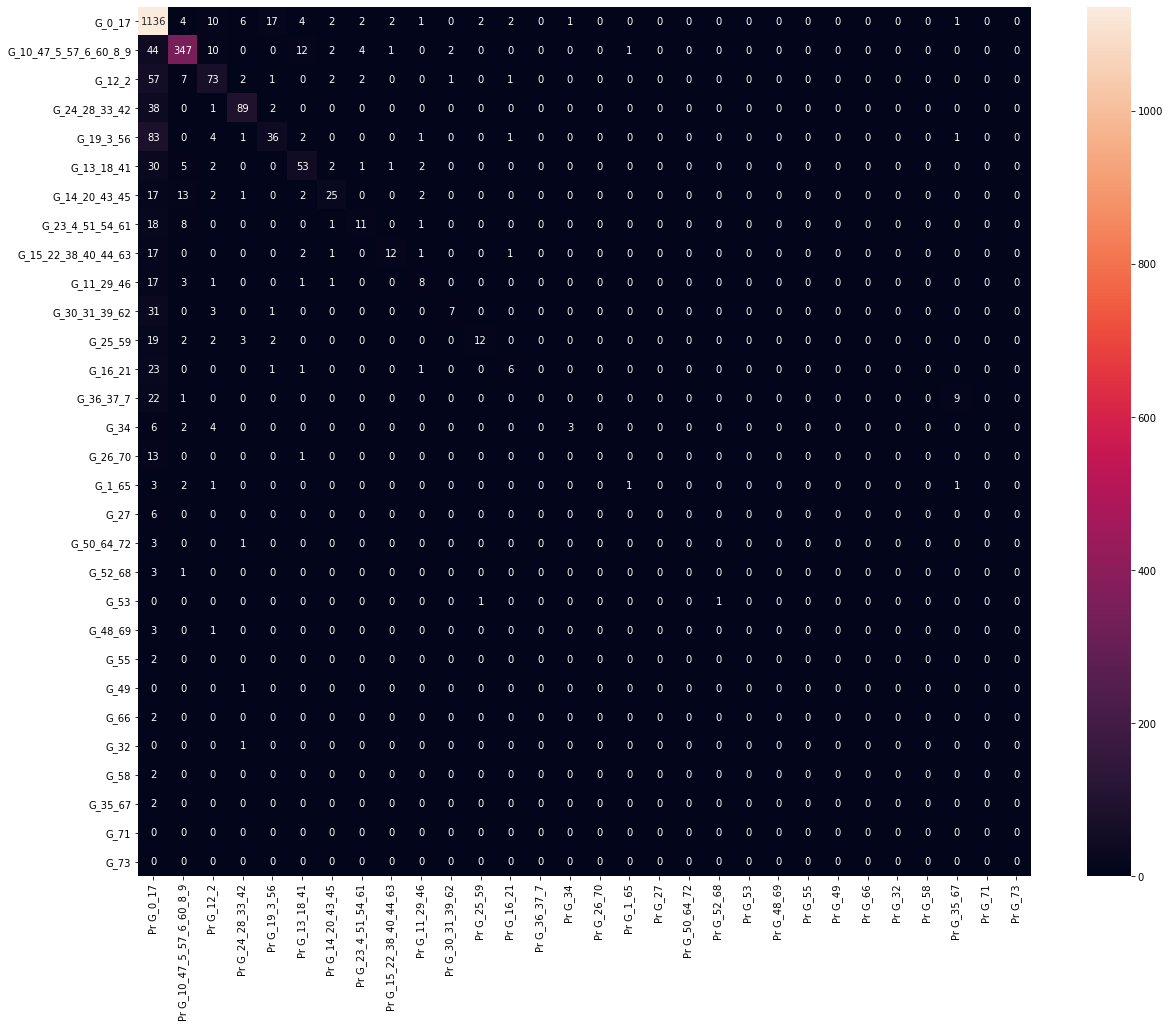

In [18]:
#svm weighted average
from sklearn.svm import SVC
classifier=SVC(gamma=0.01,C=10)
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test, 'weighted avg')
#print("svm weighted avg Count Vectorizer Report", report['weighted avg'])

## Naive Bayes

Accuracy : 0.7119935820296831
Other metrics {'precision': 0.7006703576501316, 'recall': 0.7119935820296831, 'f1-score': 0.681507545648598, 'support': 2493}

 Some random test predictions 

Title:	scan hp one printer 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	network outage apac site hard since pm et backup type outage network circuit power specify type outage top cert site start pm et scheduled maintenance power company power provider power scheduled maintenance network company maint provider maint ticket site backup circuit backup circuit active site contact notified phone email remote dial equipment reset verified site working backup circuit vendor ticket globaltelecom verizon telecomvendor telecomvendor notified gsc cert started additional diagnostics
True labels:	G_10_47_5_57_6_60_8_9
Predicted labels:	G_10_47_5_57_6_60_8_9


Title:	frequent account lockout 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	revisar pc lpaw grfv usadtto dfsdpor ffthhiago frsilva usar

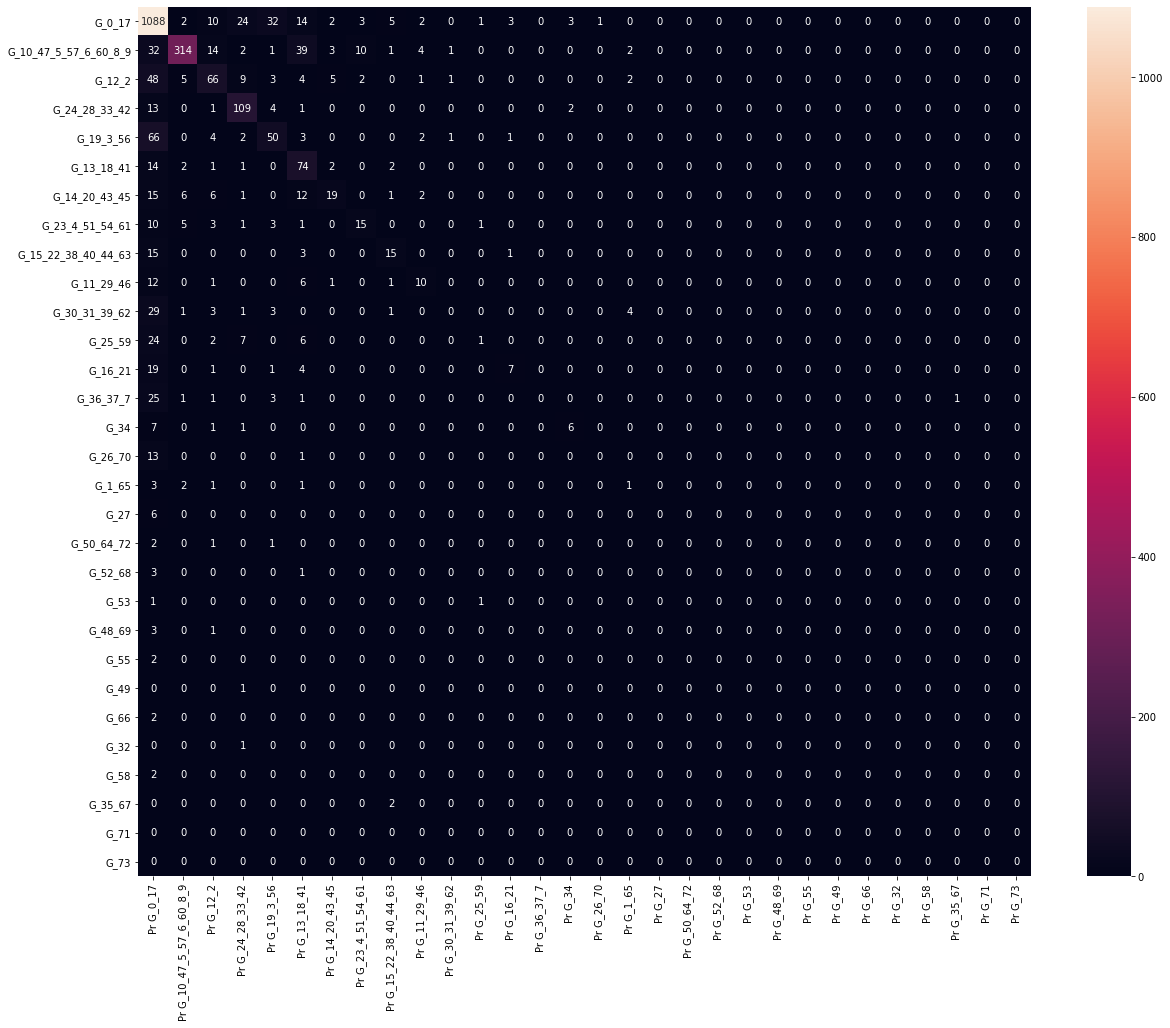

In [19]:
#Naive Bayes weighted average
classifier = naive_bayes.MultinomialNB()
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test,'weighted avg')

## KNN

In [20]:
#knn elbow method to decide the number of neighbours
error_rate = []
# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vec,y_train)
    pred_i = knn.predict(X_test_vec)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

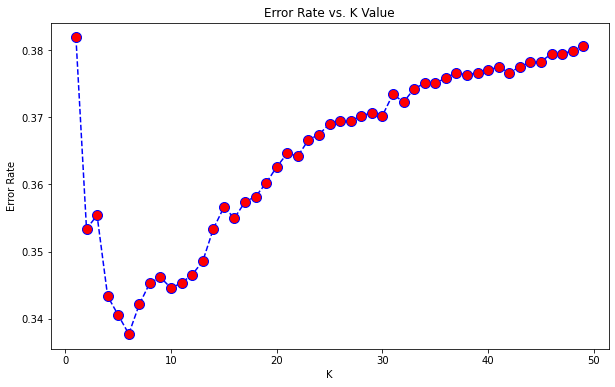

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy : 0.6546329723225031
Other metrics {'precision': 0.7158560734334911, 'recall': 0.6546329723225031, 'f1-score': 0.5773359530042892, 'support': 2493}

 Some random test predictions 

Title:	job job failed jobscheduler 
True labels:	G_10_47_5_57_6_60_8_9
Predicted labels:	G_10_47_5_57_6_60_8_9


Title:	spam user account updated ancile uperform log
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	window account lockout 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	cannot print anymore tc printer asking trusted source driver install still work update
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	getting error trying access precall planning report cmor attached keinyujo torveda access pre call planning section account record get error one get reportingengineeringtool crm dashbankrd fied opened crm issue happened
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	change erp logon language german english 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	j

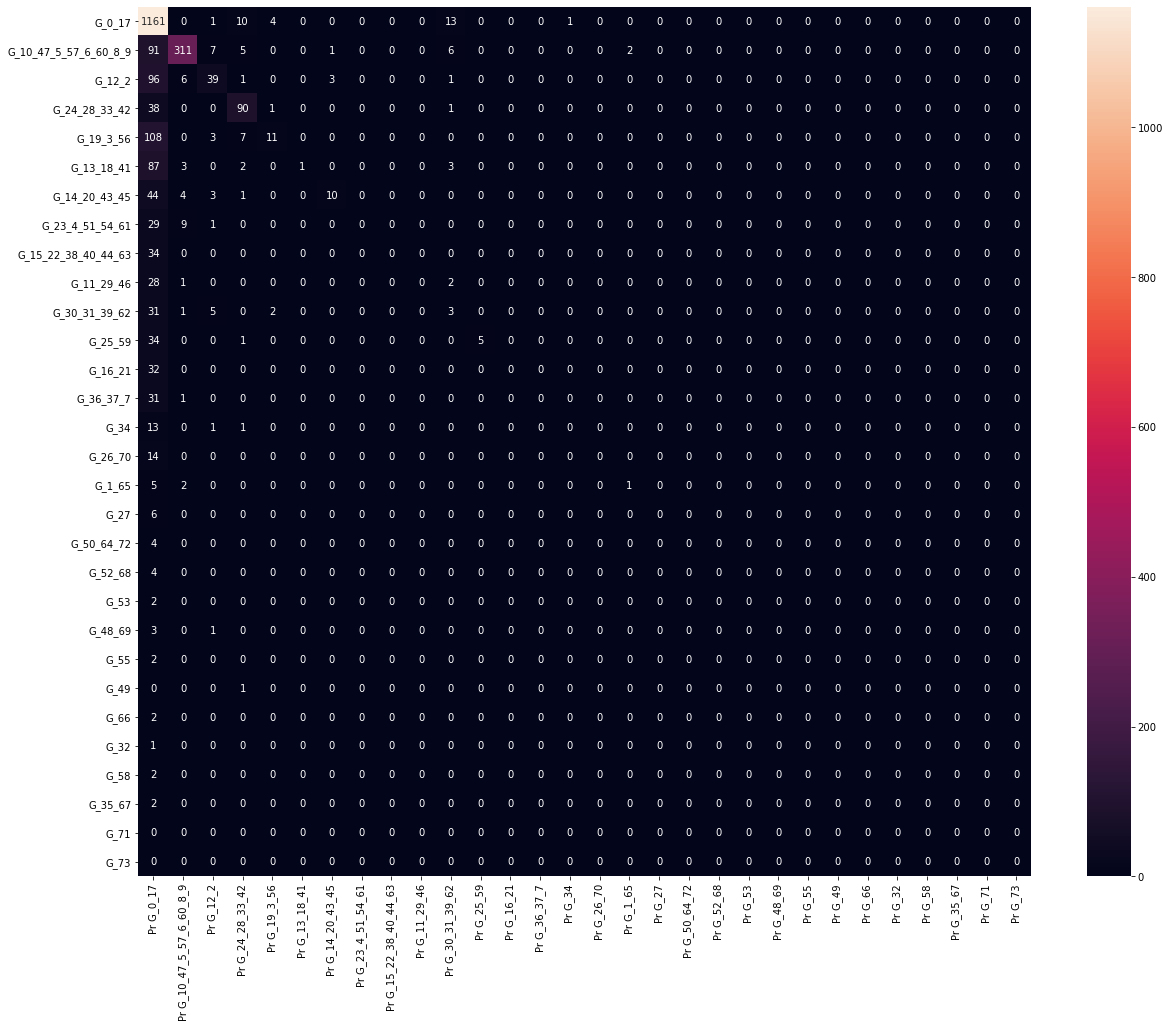

In [22]:
#Knn weighted average
classifier = KNeighborsClassifier(n_neighbors=8)
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test,'weighted avg')
#print("KNN weighted avg Count Vectorizer Report", report['weighted avg'])

## Bidirectional LSTM

In [23]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

    
vocabSize = 10000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df1['issue_description'].values)
X = tokenizer.texts_to_sequences(df1['issue_description'].values)

In [65]:
#tokenizer.word_index

In [66]:
#X

In [26]:
X = pad_sequences(X,maxlen=60)

In [27]:
X.shape

(8310, 60)

In [28]:
X

array([[   0,    0,    0, ...,   24,    6,  239],
       [   0,    0,    0, ...,  294,  321,  376],
       [   0,    0,    0, ...,   60,   56, 7114],
       ...,
       [   0,    0,    0, ...,    3,    9,    3],
       [   0,    0,    0, ...,  168,  341,   71],
       [   0,    0,    0, ..., 1021,   34,  700]])

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1['Combined_grps'])
df1['Target'] = le.transform(df1['Combined_grps'])
Y=df1['Target']
Y_LSTM = pd.get_dummies(df1['Target']).values

In [30]:
all_words = 15000
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt',encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((all_words, 50))

Loaded 400000 word vectors.


In [31]:
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [32]:
len(embeddings_index)

400000

In [33]:
embeddings_index.get(word)

In [34]:
Y_LSTM.shape

(8310, 30)

In [35]:
len(X)

8310

In [67]:
#embeddings_index

In [37]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X,Y_LSTM, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7063, 60) (7063, 30)
(1247, 60) (1247, 30)


In [38]:
np.argwhere(np.isnan(X_test))

array([], shape=(0, 2), dtype=int64)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional, Input
from keras.callbacks import EarlyStopping

embed_dim = 50
lstm_out = 100

model = Sequential()
model.add(Embedding(all_words, embed_dim,weights=[embedding_matrix],input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(30,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 50)            750000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 30)                6030      
                                                                 
Total params: 876,830
Trainable params: 876,830
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
batch_size = 5
history1=model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 1,validation_data=(X_test, Y_test))

Epoch 1/20
1413/1413 [==============================] - 160s 102ms/step - loss: 1.5141 - accuracy: 0.6160 - val_loss: 1.2756 - val_accuracy: 0.6664
Epoch 2/20
1413/1413 [==============================] - 175s 124ms/step - loss: 1.2406 - accuracy: 0.6735 - val_loss: 1.1802 - val_accuracy: 0.6824
Epoch 3/20
1413/1413 [==============================] - 174s 123ms/step - loss: 1.1061 - accuracy: 0.6984 - val_loss: 1.1197 - val_accuracy: 0.6985
Epoch 4/20
1413/1413 [==============================] - 178s 126ms/step - loss: 1.0070 - accuracy: 0.7198 - val_loss: 1.0968 - val_accuracy: 0.7097
Epoch 5/20
1413/1413 [==============================] - 185s 131ms/step - loss: 0.9331 - accuracy: 0.7392 - val_loss: 1.0691 - val_accuracy: 0.7113
Epoch 6/20
1413/1413 [==============================] - 193s 137ms/step - loss: 0.8536 - accuracy: 0.7576 - val_loss: 1.0671 - val_accuracy: 0.7233
Epoch 7/20
1413/1413 [==============================] - 190s 134ms/step - loss: 0.7734 - accuracy: 0.7757 - val_

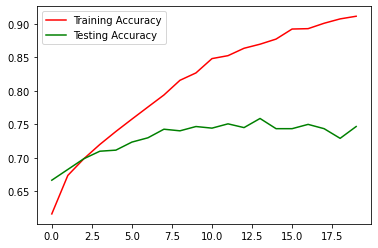

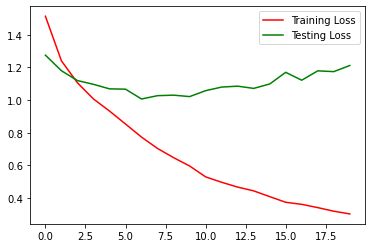

In [41]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [86]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [42]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

250/250 - 4s - loss: 1.2121 - accuracy: 0.7466 - 4s/epoch - 16ms/step
score: 1.21
acc: 0.75


## LSTM Model

In [43]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
embed_dim = 50
input_layer = Input(shape=(X_train.shape[1],),dtype=tf.int64)
embed = Embedding(all_words,embed_dim,input_length=X_train.shape[1],weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=LSTM(128)(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(30,activation='softmax')(dense) 

In [44]:
model_LSTM = Model(input_layer,out)
model_LSTM.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model_LSTM.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 60, 50)            750000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
Total params: 857,578
Trainable params: 857,578
Non-trainable

In [45]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
#reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
LSTM_history = model_LSTM.fit(X_train,Y_train,batch_size=10, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
707/707 [==============================] - 53s 68ms/step - loss: 1.5404 - accuracy: 0.6140 - val_loss: 1.2866 - val_accuracy: 0.6568
Epoch 2/20
707/707 [==============================] - 49s 69ms/step - loss: 1.1841 - accuracy: 0.6901 - val_loss: 1.1389 - val_accuracy: 0.6961
Epoch 3/20
707/707 [==============================] - 47s 66ms/step - loss: 1.0036 - accuracy: 0.7280 - val_loss: 1.1255 - val_accuracy: 0.7049
Epoch 4/20
707/707 [==============================] - 41s 59ms/step - loss: 0.8529 - accuracy: 0.7626 - val_loss: 1.1340 - val_accuracy: 0.7017
Epoch 5/20
707/707 [==============================] - 47s 66ms/step - loss: 0.7159 - accuracy: 0.7957 - val_loss: 1.1268 - val_accuracy: 0.7105
Epoch 6/20
707/707 [==============================] - 47s 66ms/step - loss: 0.5914 - accuracy: 0.8310 - val_loss: 1.1392 - val_accuracy: 0.7113
Epoch 7/20
707/707 [==============================] - 47s 67ms/step - loss: 0.4726 - accuracy: 0.8659 - val_loss: 1.2436 - val_accuracy:

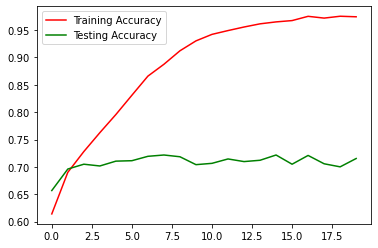

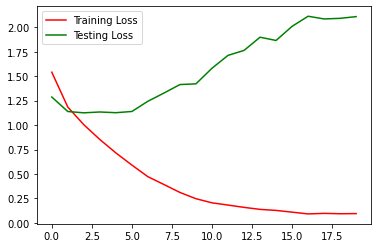

In [46]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=LSTM_history.history['accuracy']
val_acc=LSTM_history.history['val_accuracy']
loss=LSTM_history.history['loss']
val_loss=LSTM_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [47]:
score,acc = model_LSTM.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

250/250 - 2s - loss: 2.1085 - accuracy: 0.7153 - 2s/epoch - 9ms/step
score: 2.11
acc: 0.72


## Bidirectional LSTM Model with attention

In [49]:
from keras.layers import *
from keras.models import *
from keras import backend as K

In [50]:
class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [61]:
model = Sequential()
model.add(Embedding(all_words, embed_dim, input_length = X_train.shape[1]))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
#model.add(SpatialDropout1D(0.4))
model.add(Attention(return_sequences=True)) # receive 3D and output 3D
model.add(SpatialDropout1D(0.4))
model.add(LSTM(50))
model.add(Dense(30,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 60, 50)            750000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 60, 200)          120800    
 nal)                                                            
                                                                 
 attention_6 (Attention)     (None, 60, 200)           260       
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 lstm_14 (LSTM)              (None, 50)                50200     
                                                                 
 dense_7 (Dense)             (None, 30)               

In [62]:
batch_size = 5
history_att=model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 1,validation_data=(X_test, Y_test))

Epoch 1/5
1413/1413 [==============================] - 124s 85ms/step - loss: 1.6147 - accuracy: 0.5833 - val_loss: 1.3860 - val_accuracy: 0.6175
Epoch 2/5
1413/1413 [==============================] - 121s 86ms/step - loss: 1.3156 - accuracy: 0.6548 - val_loss: 1.3332 - val_accuracy: 0.6407
Epoch 3/5
1413/1413 [==============================] - 119s 84ms/step - loss: 1.1852 - accuracy: 0.6793 - val_loss: 1.3384 - val_accuracy: 0.6496
Epoch 4/5
1413/1413 [==============================] - 125s 89ms/step - loss: 1.0720 - accuracy: 0.7154 - val_loss: 1.3438 - val_accuracy: 0.6375
Epoch 5/5
1413/1413 [==============================] - 121s 86ms/step - loss: 0.9905 - accuracy: 0.7320 - val_loss: 1.4039 - val_accuracy: 0.6383


In [64]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

250/250 - 4s - loss: 1.4039 - accuracy: 0.6383 - 4s/epoch - 14ms/step
score: 1.40
acc: 0.64
